# Stochastic Simulation Coursework 2
## 2022.11.30

#### CID: 01868678

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Q1: Importance Sampling for Marginal Likelihoods

### 1. Find expression and value for $p\left(y\right)$.

The analytical expression of $p\left(y\right)$ is
$$
p\left(y\right)=\int p\left(y|x\right) p\left(x\right) \,dx = \int \mathcal{N}\left(y;x,1\right) \mathcal{N}\left(x;0,1\right) \,dx=\mathcal{N}\left(y;0,1+1\right)=\mathcal{N}\left(y;0,2\right)
$$

To find exact value of $p\left(y=9\right)$, we look at function
$$
p\left(y=9\right)=\int p\left(y=9|x\right) p\left(x\right) \,dx =\mathcal{N}\left(y=9;0,2\right) \approx 4.53\times 10^{-10}
$$

In [2]:
# define the function of Gaussian
def Gaussian(x, mu, sigma2):
    return np.exp(-(x-mu)**2/(2*sigma2))/np.sqrt(2*np.pi*sigma2)

# calculate p value
p = Gaussian(9, 0, 2)
print(p)

4.5282647397717255e-10


### 2. Implement the standard MC estimator.

For fixed $p\left(y=9\right)$, we have the integral
$$
p\left(y=9\right)=\int p\left(y=9|x\right) p\left(x\right) \,dx
$$
where we can set test function $\phi \left(x\right)= p\left(y=9|x\right)$.

Then the MC estimator for $p\left(y=9\right)$ is
$$
p^N_{MC}\left(y=9\right)=\frac{1}{N}\sum_{i=1}^{N} p\left(y=9|X_i\right)
$$
for $X_1$, ..., $X_N \sim p\left(x\right)$.

Calculate the results for diffrent $N$ and plot the graph of RAE.

[8.460702781169037e-16, 6.0198275291169e-13, 7.153501463322011e-11, 6.519351300487069e-11, 5.189576678564284e-10]
[0.9999981315794753, 0.9986706105152721, 0.8420255467730752, 0.8560298110835342, 0.14604091783421133]


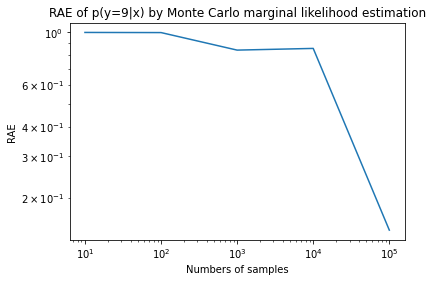

In [7]:
# perform Monte Carlo to estimate p(y=9)
def est_MC(n):
    sol = 0
    for i in range(n):
        xi = np.random.normal(0, 1)
        sol += Gaussian(9, xi, 1)
    return (1/n)*sol

# calculate estimator and RAE for different values of N
N = np.array([10, 100, 1000, 10000, 100000])
EST_MC = []
RAE_MC = []
for j in range(len(N)):
    estj_MC = est_MC(N[j])
    solj_MC = abs(estj_MC-p)/abs(p)
    EST_MC.append(estj_MC)
    RAE_MC.append(solj_MC)

# print the results and plot
print(EST_MC)
print(RAE_MC)
plt.loglog(N, RAE_MC)
plt.title("RAE of p(y=9|x) by Monte Carlo marginal likelihood estimation")
plt.xlabel("Numbers of samples") 
plt.ylabel("RAE") 
plt.show()

### 3.  IS estimation for $p\left(y\right)$.

The weight function is 
$$
w\left(x\right) = \frac{p\left(x\right)}{q\left(x\right)} = \frac{\mathcal{N}\left(x;0,1\right)}{\mathcal{N}\left(x;6,1\right)}
$$

Then the IS estimator for $p\left(y=9\right)$ is
$$
p^N_{IS}\left(y=9\right)=\frac{1}{N}\sum_{i=1}^{N} p\left(y=9|X_i\right)w_i
$$
for $X_1$, ..., $X_N \sim p\left(x\right)$ and $w_i = w\left(X_i\right) = \frac{p\left(X_i\right)}{q\left(X_i\right)}$.

Calculate the results for diffrent $N$ and plot the graph of RAE.

[8.831916066830993e-10, 3.1859430901279106e-10, 4.6426206220003566e-10, 4.503366185995034e-10, 4.530374046285349e-10]
[0.950397464454832, 0.2964317960154164, 0.025253797823312756, 0.005498475731334252, 0.00046580900959640356]


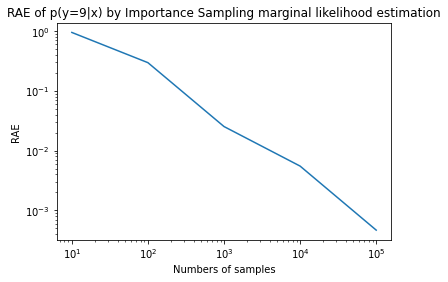

In [9]:
# weights function
def w_IS(x):
    return Gaussian(x, 0, 1) / Gaussian(x, 6, 1)

# perform importance sampling to estimate p(y=9)
def est_IS(n):
    sol = 0
    y = 9
    for i in range(n):
        xi = np.random.normal(6, 1)
        wi = w_IS(xi)
        sol += wi*Gaussian(9, xi, 1)
    return (1/n)*sol

# calculate estimator and RAE for different values of N
EST_IS = []
RAE_IS = []
for j in range(len(N)):
    estj_IS = est_IS(N[j])
    solj_IS = abs(estj_IS-p)/abs(p)
    EST_IS.append(estj_IS)
    RAE_IS.append(solj_IS)

# print the results and plot
print(EST_IS)
print(RAE_IS)
plt.loglog(N, RAE_IS)
plt.title("RAE of p(y=9|x) by Importance Sampling marginal likelihood estimation")
plt.xlabel("Numbers of samples") 
plt.ylabel("RAE") 
plt.show()

### 4. Compare the RAE for MC and IS

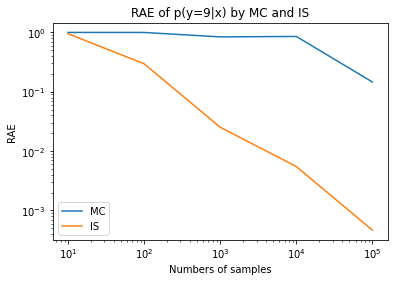

In [10]:
plt.loglog(N, RAE_MC, label='MC')
plt.loglog(N, RAE_IS, label='IS')
plt.title("RAE of p(y=9|x) by MC and IS")
plt.xlabel("Numbers of samples") 
plt.ylabel("RAE") 
plt.legend()
plt.show()

From the graph above, we can see that RAE values of Importance Sampling Estimation is smaller than Monte Carlo Estimation. And when $N$ becomes large, RAE values of Importance Sampling Estimation decays faster.  Therefore, the Importance Sampling method is more accurate.

## Q2: Metropolis-Hastings for 1D Source Localisation 

### 1. Describe the model, derive acceptance ratio and descirbe the MH algorithm.

There are three sensors on locations $s_0$, $s_1$ and $s_2$. We define the distribution of distance of hidden object to the three sensors and try to estimate the posterior distribution of the hidden object by Metropolis-Hastings.

The distribution over the location of the hidden object is proportional to the product of disrtibution of observed values and the prior: 
$$
p\left(x|y_1,y_2,y_3,s_1,s_2,s_3\right) = \frac{\prod_{i=1}^{3}p\left(y_i|x,s_i\right)p\left(x\right)}{p\left(y_{i:3}\right)}\\
p\left(x|y_1,y_2,y_3,s_1,s_2,s_3\right)\propto p\left(x\right)\prod_{i=1}^{3}p\left(y_i|x,s_i\right)
$$
Therefore, we can set the unnormalised posterior density 
$$
\bar{p}_* \left(x|y_1,y_2,y_3,s_1,s_2,s_3\right) = p\left(x\right)\prod_{i=1}^{3}p\left(y_i|x,s_i\right)
$$
Since we have a symmetric proposal, we can derive the acceptance ratio as follow:

$$
r\left(x, x'\right)=\frac{p_*\left(x'\right)q\left(x|x'\right)}{p_*\left(x\right)q\left(x'|x\right)}=\frac{p_*\left(x'\right)q\left(x'|x\right)}{p_*\left(x\right)q\left(x'|x\right)}=\frac{p_*\left(x'\right)}{p_*\left(x\right)}\\
r\left(x, x'\right)=\frac{\bar{p}_*\left(x'|y, s\right)}{\bar{p}_*\left(x|y, s\right)}=\frac{p\left(x'\right)p\left(y_1|x', s_1\right)p\left(y_2|x', s_2\right)p\left(y_3|x', s_3\right)}{p\left(x\right)p\left(y_1|x, s_1\right)p\left(y_2|x, s_2\right)p\left(y_3|x, s_3\right)}
$$


The log acceptance ratio is

$$
\text{log}r\left(x, x'\right)= \text{log}p\left(x'\right)+\text{log}p\left(y_1|x', s_1\right)+\text{log}p\left(y_2|x', s_2\right)+\text{log}p\left(y_3|x', s_3\right)
\\
-\text{log}p\left(x\right)-\text{log}p\left(y_1|x, s_1\right)-\text{log}p\left(y_2|x, s_2\right)-\text{log}p\left(y_3|x, s_3\right)
$$

Therefore, we derived the acceptance ratio for the unnormalised posterior using the prior, likelihood, and the symmetric proposal.

For the MH algorithm, we first sample $X'$ from proposal $q\left(x'|X_{n-1}\right)$. Then sample from uniform distribution $U \sim \textrm{Unif} \left(0,1\right)$. If $U$ is less than or equal to the acceptance ratio, we accept $X'$ and take $X_{N}=X'$. Otherwise, reject the sample and set $X_{N}=X_{N-1}$. Discard first burnin samples for the system to be stationary and return the remaining samples.

### 2. Plot the histogram of samples and comment on effect of $\sigma_q$.

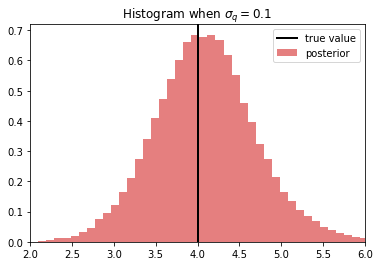

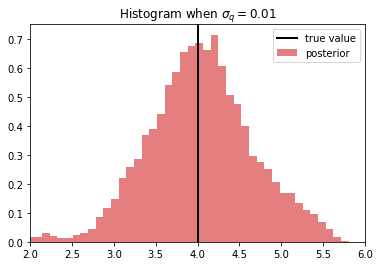

In [10]:
# define the log pdf function of Gaussian
def logGaussian(x, mu, sigma):
    return -np.log(sigma) - np.log(2*np.pi)/2 - (((x-mu)/sigma)**2)/2

# Metropolis Hastings method
def MHmethod(n, x0, sigmaq, sigmay, y0, y1, y2):
    x = x0
    sol = []
    for i in range(n):
        # sample X' from proposal
        xp = np.random.normal(x, sigmaq)
        # calculate acceptance ratio
        r = logGaussian(xp, 0, 10) + logGaussian(y0, abs(xp - (-1)), sigmay) + logGaussian(y1, abs(xp - 2), sigmay)+ \
            logGaussian(y2, abs(xp - 5), sigmay) - logGaussian(x, 0, 10) - logGaussian(y0, abs(x - (-1)), sigmay) - \
            logGaussian(y1, abs(x - 2), sigmay) - logGaussian(y2, abs(x - 5), sigmay)
        # sample U from uniform distribution
        u = np.random.random(1)
        if np.log(u) <= r:
            x = xp
        else:
            x = x
        sol.append(x)
    return sol

# for sigma_q = 0.1, burnin period = 1000, N = 100000
x_true = 4
h1 = MHmethod(100000, 10, 0.1, 1, 4.44, 2.51, 0.73)
plt.axvline(x_true , color='k', label='true value', linewidth=2) # plot the true value vertically
plt.hist(h1[1000:100000], bins=50 , density=True , label='posterior', alpha=0.5, color=[0.8, 0, 0]) # Histogram of samples by MH
plt.title("Histogram when $\sigma_q = 0.1$")
plt.xlim((2,6))
plt.legend()
plt.show ()


# for sigma_q = 0.01, burnin period = 20000, N = 1000000
h2 = MHmethod(1000000, 10, 0.01, 1, 4.44, 2.51, 0.73)
plt.axvline(x_true , color='k', label='true value', linewidth=2) # plot the true value vertically
plt.hist(h2[20000:1000000], bins=50 , density=True , label='posterior', alpha=0.5, color=[0.8, 0, 0]) # Histogram of samples by MH
plt.title("Histogram when $\sigma_q = 0.01$")
plt.xlim((2,6))
plt.legend()
plt.show()

And when $\sigma_q$ is smaller, sample $X'$ will be closer to $X$, the acceptance ratio will be smaller. There will be more new sample $X'$ rejected and $X_{i+1}=X_{i}$ so it takes more iterations to reach stationary, and longer burnin period and larger value of $N$ are needed. 

### 3. Comment on effect of values of $\{y_i\}_{i=1,2,3}$.

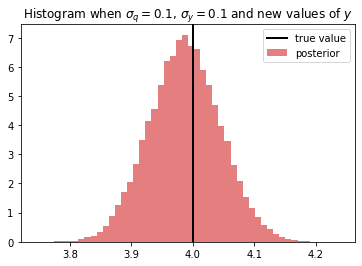

In [11]:
# for sigma_q = 0.1, burnin period = 1000, N = 100000, sigma_y = 0.1, y0 = 5.01, y1 = 1.97, y2 = 1.02.
h3 = MHmethod(100000, 10, 0.1, 0.1, 5.01, 1.97, 1.02)
plt.axvline(x_true , color='k', label='true value', linewidth=2) # plot the true value vertically
plt.hist(h3[1000:100000], bins=50 , density=True , label='posterior', alpha=0.5, color=[0.8, 0, 0]) # Histogram of samples by MH
plt.title("Histogram when $\sigma_q = 0.1$, $\sigma_y = 0.1$ and new values of $y$")
plt.legend()
plt.show()

The samples sampled from MH method are more concentrate around true position $x_{\textrm{true}} = 4$. The variance of samples are smaller. As $y_i$ is closer to $||x_{\text{true}}-s_i||$ and $\sigma_y$ is smalle, the model will be more accurate.